In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("Churn_Modelling.csv")

### Veri Setini Tanıma

In [48]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [50]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
# Yaş Grubu Oluşturma
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100],
                        labels=['Genç', 'Orta', 'Yetişkin', 'Yaşlı'])

In [53]:
# Kullanılmayan sütunları silme
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Orta
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Orta
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Orta
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Orta
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Orta


In [54]:
# Tekrar eden değer var mı
print(df.shape)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

(10000, 12)
number of duplicate rows:  (0, 12)


In [55]:
# Null değerleri bulma
df.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
AgeGroup           22
dtype: int64

In [56]:
for i in df.columns:
    print(df[i].value_counts())

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype:

In [57]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
AgeGroup              4
dtype: int64

## Grafikler

C:\Users\yilmazer\AppData\Local\Temp\ipykernel_14696\4152387543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette="tab10")


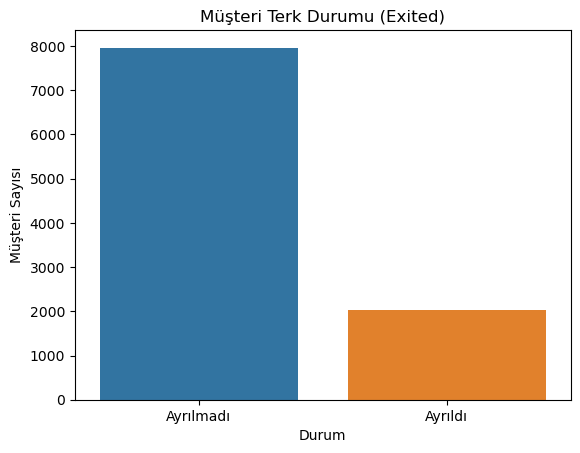

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [58]:
sns.countplot(x='Exited', data=df, palette="tab10")
plt.title("Müşteri Terk Durumu (Exited)")
plt.xticks([0, 1], ['Ayrılmadı', 'Ayrıldı'])
plt.xlabel("Durum")
plt.ylabel("Müşteri Sayısı")
plt.show()

print(df['Exited'].value_counts(normalize=True))  # Oransal dağılım

C:\Users\yilmazer\AppData\Local\Temp\ipykernel_14696\3368982927.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup',data=df, palette='tab10')


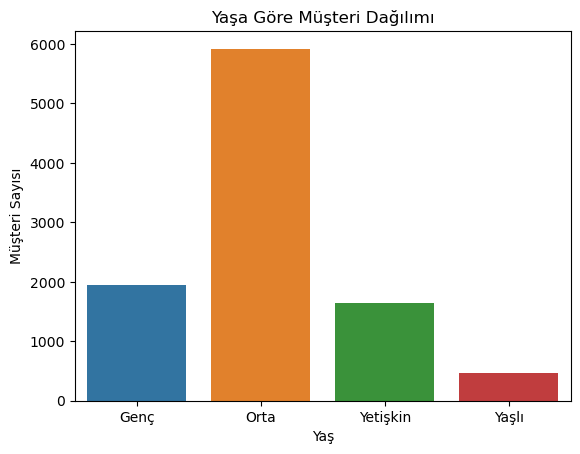

In [59]:
sns.countplot(x='AgeGroup',data=df, palette='tab10')
plt.title("Yaşa Göre Müşteri Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")
plt.show()

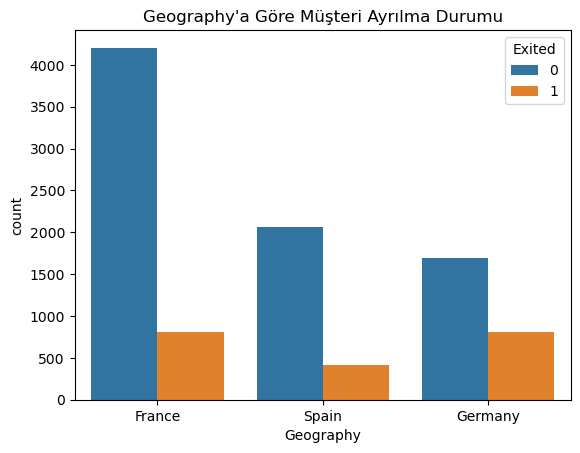

Geography  Exited
France     0         0.838452
           1         0.161548
Germany    0         0.675568
           1         0.324432
Spain      0         0.833266
           1         0.166734
Name: proportion, dtype: float64


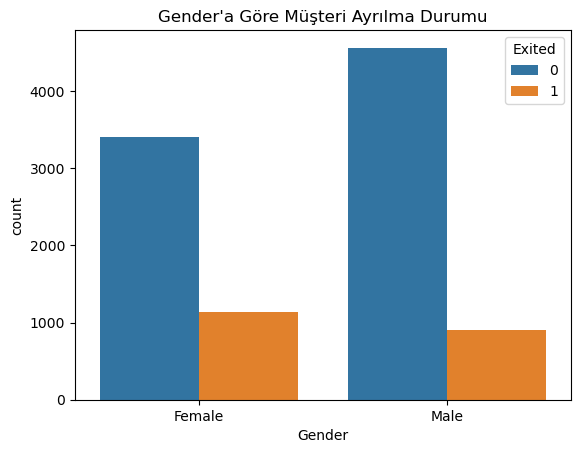

Gender  Exited
Female  0         0.749285
        1         0.250715
Male    0         0.835441
        1         0.164559
Name: proportion, dtype: float64


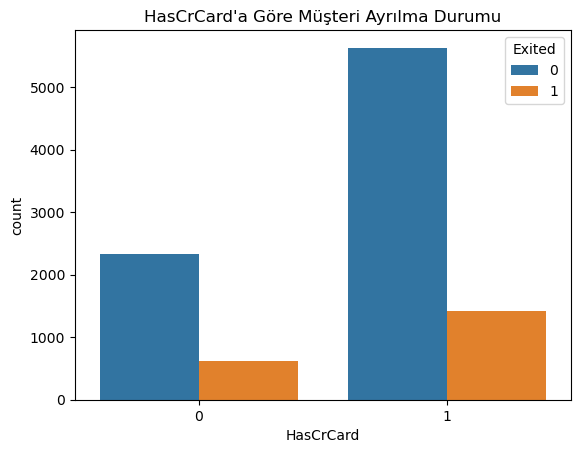

HasCrCard  Exited
0          0         0.791851
           1         0.208149
1          0         0.798157
           1         0.201843
Name: proportion, dtype: float64


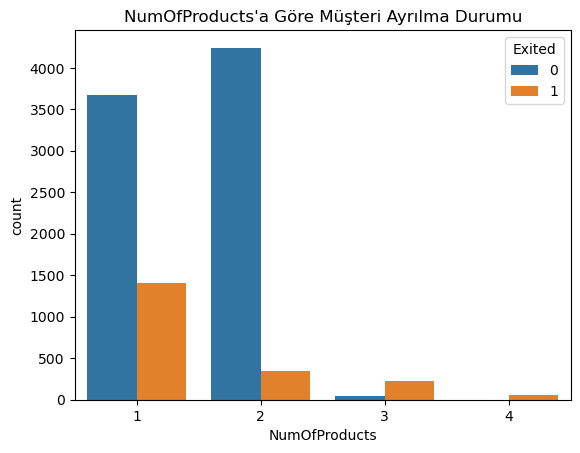

NumOfProducts  Exited
1              0         0.722856
               1         0.277144
2              0         0.924183
               1         0.075817
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: proportion, dtype: float64


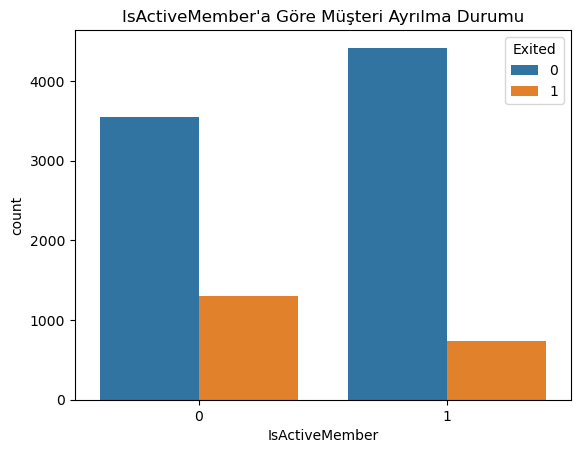

IsActiveMember  Exited
0               0         0.731491
                1         0.268509
1               0         0.857309
                1         0.142691
Name: proportion, dtype: float64


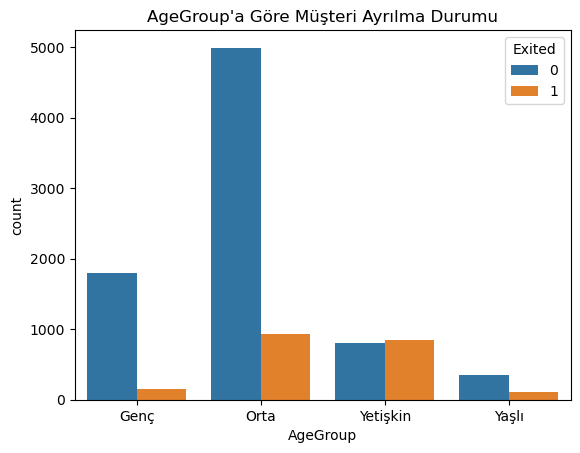

AgeGroup  Exited
Genç      0         0.924974
          1         0.075026
Orta      0         0.842594
          1         0.157406
Yetişkin  1         0.511233
          0         0.488767
Yaşlı     0         0.752155
          1         0.247845
Name: proportion, dtype: float64


C:\Users\yilmazer\AppData\Local\Temp\ipykernel_14696\2553771903.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(feature)['Exited'].value_counts(normalize=True))


In [60]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember','AgeGroup']

for feature in categorical_features:
    sns.countplot(x=feature, hue='Exited', data=df, palette='tab10')
    plt.title(f"{feature}'a Göre Müşteri Ayrılma Durumu")
    plt.show()
    print(df.groupby(feature)['Exited'].value_counts(normalize=True)) 


C:\Users\yilmazer\AppData\Local\Temp\ipykernel_14696\3406938053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='tab10')


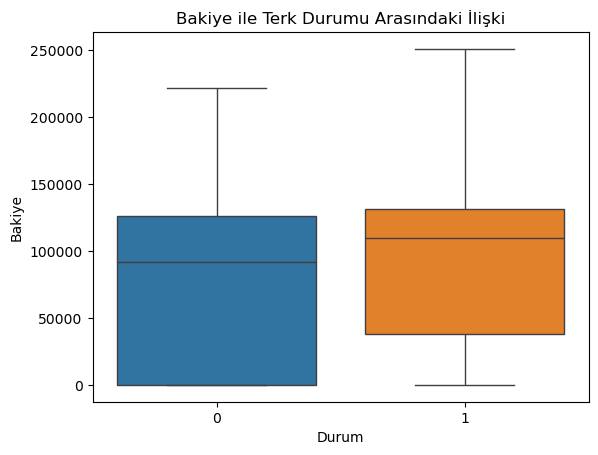

In [61]:
sns.boxplot(x='Exited', y='Balance', data=df, palette='tab10')
plt.title("Bakiye ile Terk Durumu Arasındaki İlişki")
plt.xlabel("Durum")
plt.ylabel("Bakiye")
plt.show()

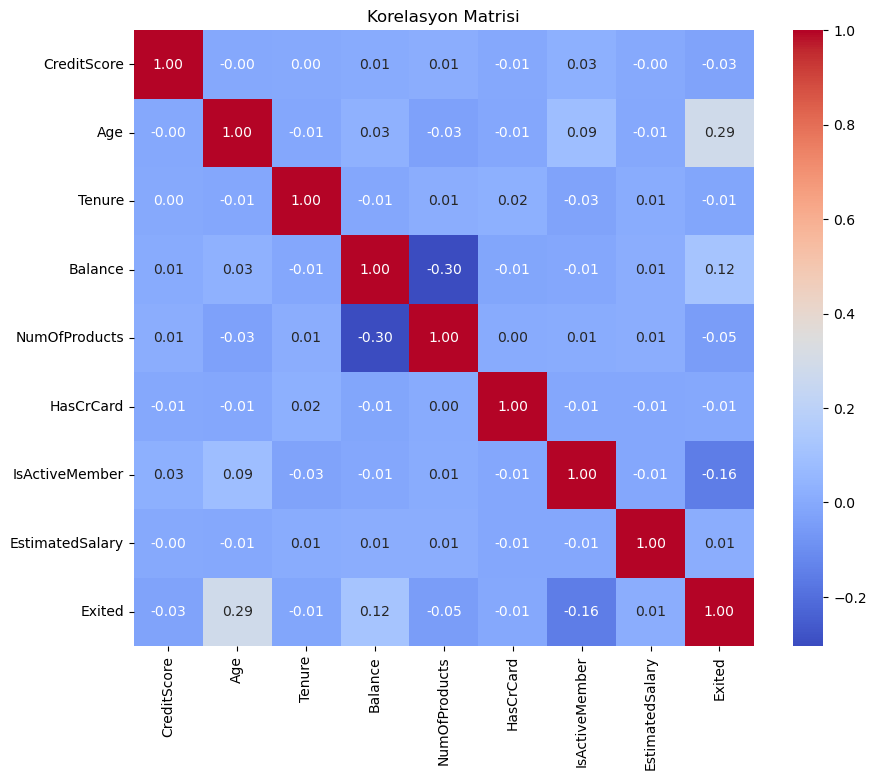

In [62]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [63]:
korelasyonlar = numeric_df.corr()['Exited'].drop('Exited').sort_values(key=abs, ascending=False)
print(korelasyonlar)

Age                0.285323
IsActiveMember    -0.156128
Balance            0.118533
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
EstimatedSalary    0.012097
HasCrCard         -0.007138
Name: Exited, dtype: float64


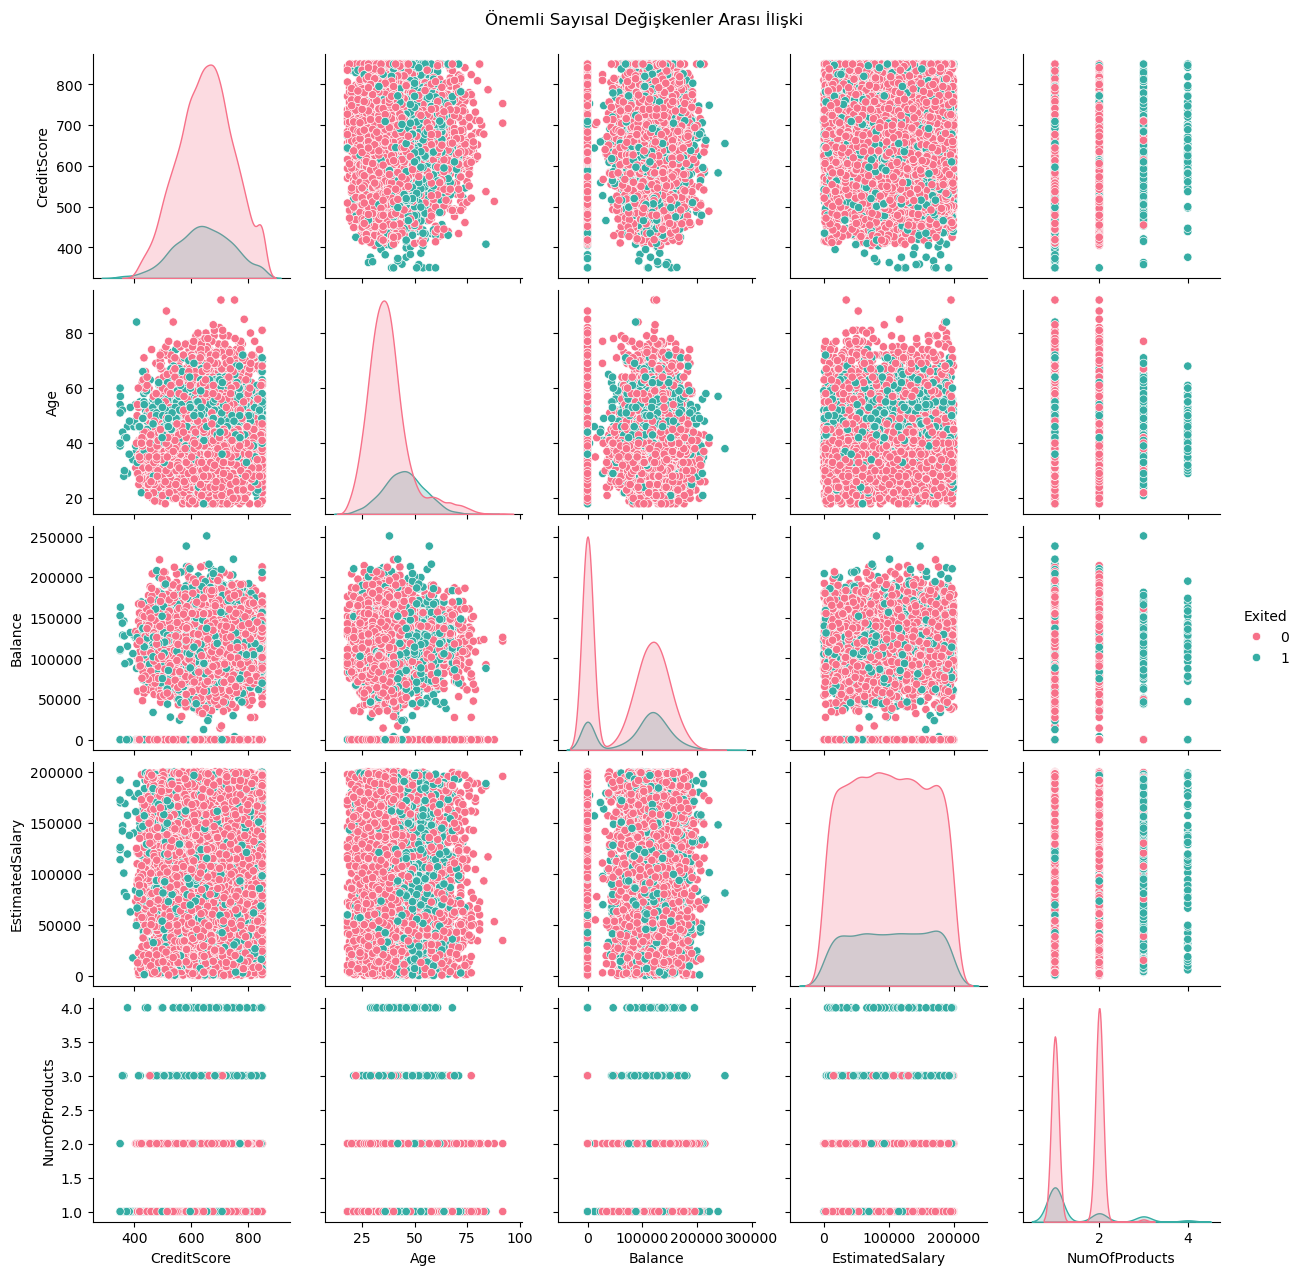

In [64]:
selected = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Exited']
sns.pairplot(df[selected], hue='Exited', palette='husl')
plt.suptitle("Önemli Sayısal Değişkenler Arası İlişki", y=1.02)
plt.show()

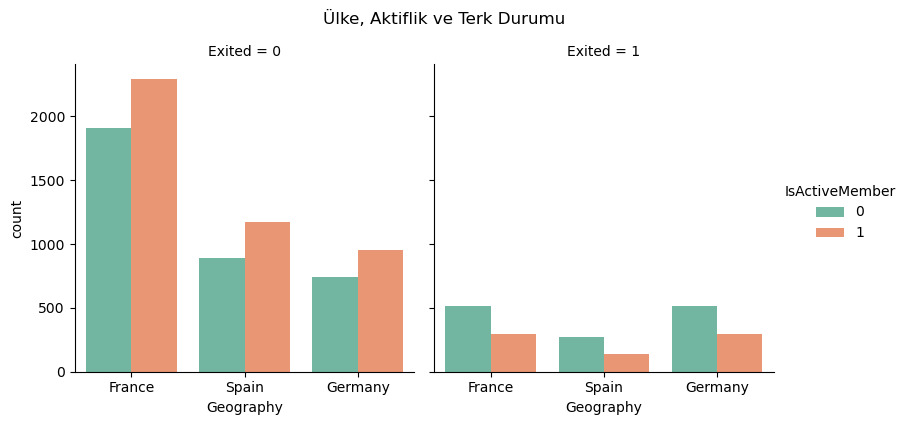

In [65]:
sns.catplot(x="Geography", hue="IsActiveMember", col="Exited",
            data=df, kind="count", palette="Set2", height=4, aspect=1)
plt.suptitle("Ülke, Aktiflik ve Terk Durumu", y=1.05)
plt.show()


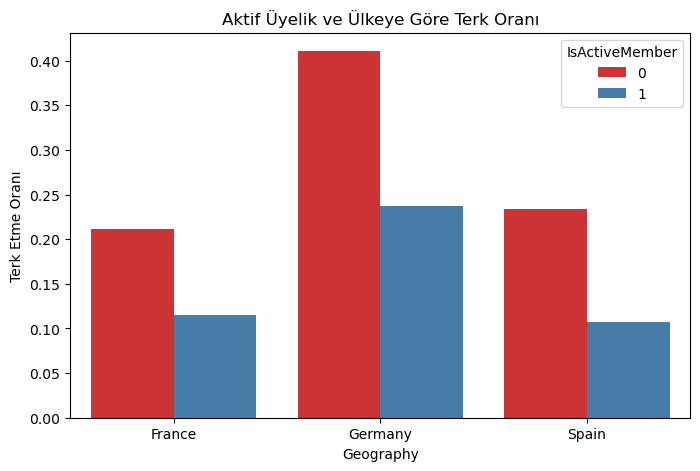

In [66]:
grouped = df.groupby(['Geography', 'IsActiveMember'])['Exited'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Geography', y='Exited', hue='IsActiveMember', data=grouped, palette='Set1')
plt.title("Aktif Üyelik ve Ülkeye Göre Terk Oranı")
plt.ylabel("Terk Etme Oranı")
plt.show()

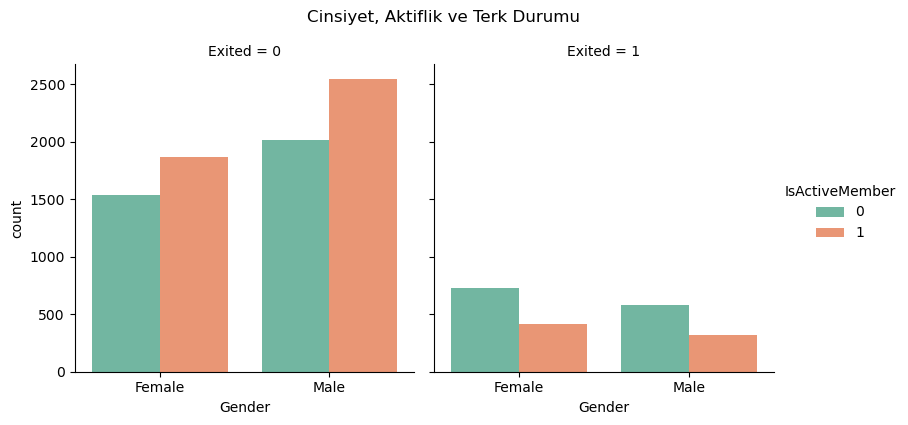

In [67]:
sns.catplot(x="Gender", hue="IsActiveMember", col="Exited",
            data=df, kind="count", palette="Set2", height=4, aspect=1)
plt.suptitle("Cinsiyet, Aktiflik ve Terk Durumu", y=1.05)
plt.show()

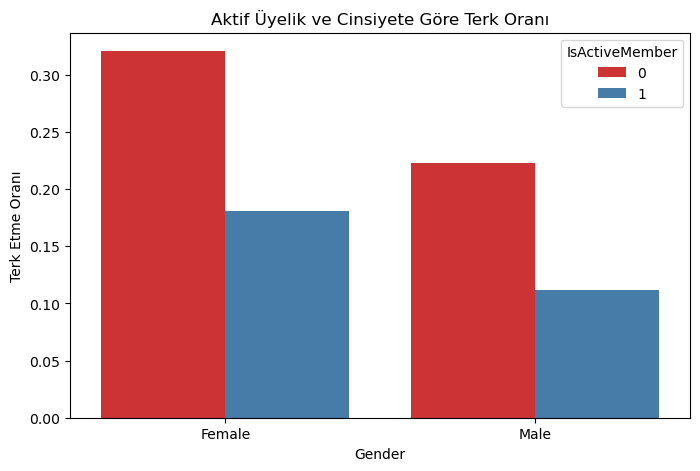

In [68]:
grouped = df.groupby(['Gender', 'IsActiveMember'])['Exited'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Exited', hue='IsActiveMember', data=grouped, palette='Set1')
plt.title("Aktif Üyelik ve Cinsiyete Göre Terk Oranı")
plt.ylabel("Terk Etme Oranı")
plt.show()

### One Hot Encoding

In [69]:
# one-hot encoding (ilk kategori drop edilir - dummy variable trap için)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
print(df.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'AgeGroup',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [70]:
print(df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].head())

   Geography_Germany  Geography_Spain  Gender_Male
0              False            False        False
1              False             True        False
2              False            False        False
3              False            False        False
4              False             True        False


In [71]:
# Sadece bool sütunları int'e çevir
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)


## K-Means Kümeleme Analizi

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
selected_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 
                     'IsActiveMember', 'HasCrCard', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

# Ölçekleme (çok önemli K-Means için!)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[selected_features])

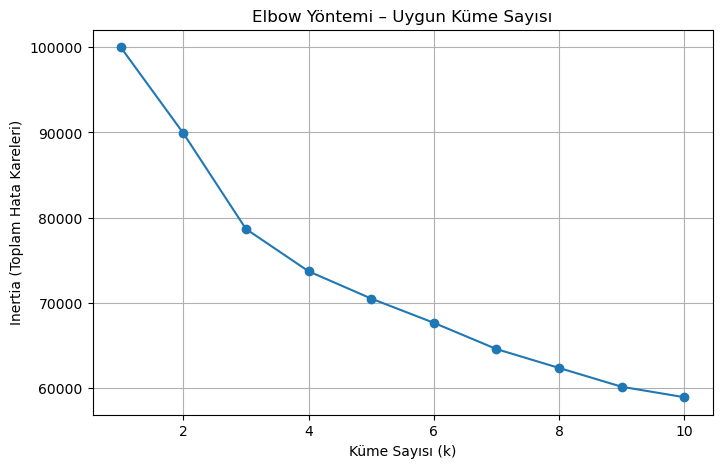

Grafiğe göre k=4 seçtik


In [74]:
# Uygun küme sayısını belirleme
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Yöntemi – Uygun Küme Sayısı')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Toplam Hata Kareleri)')
plt.grid(True)
plt.show()

print("Grafiğe göre k=4 seçtik")


In [75]:
# K-means modelini oluştur (k = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


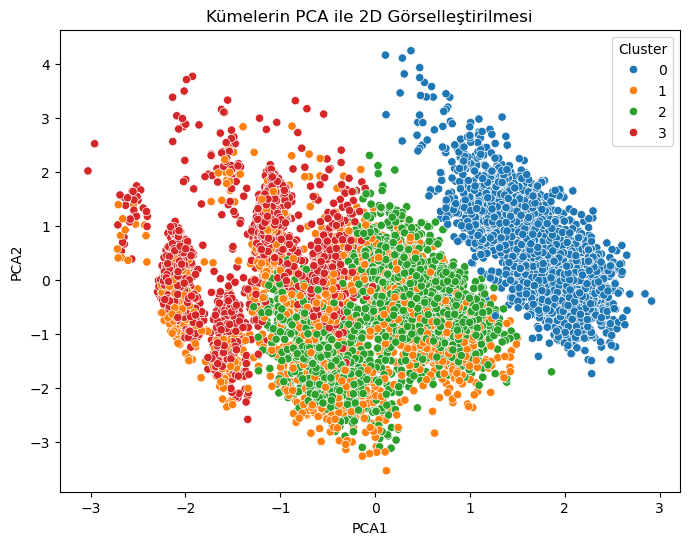

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Kümelerin PCA ile 2D Görselleştirilmesi')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [77]:
# Küme Özelliklerini İstatistiksel Olarak İncelemek
cluster_summary = df.groupby('Cluster')[selected_features].mean()
cluster_summary

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,IsActiveMember,HasCrCard,Geography_Germany,Geography_Spain,Gender_Male
Cluster,,,,,,,,,,
0,651.453567,39.771622,119730.116134,1.519729,101113.435102,0.497409,0.713830,1.0,0.000000,0.524512
1,649.497974,38.769023,64998.847695,1.531742,101296.766236,0.524989,0.000000,0.0,0.340387,0.550653
2,651.237999,38.559500,122481.364655,1.211376,99838.502457,0.526422,0.999597,0.0,0.320694,0.572005
3,649.887854,38.601218,5898.347470,1.821569,98433.903526,0.513078,0.998209,0.0,0.331781,0.537442


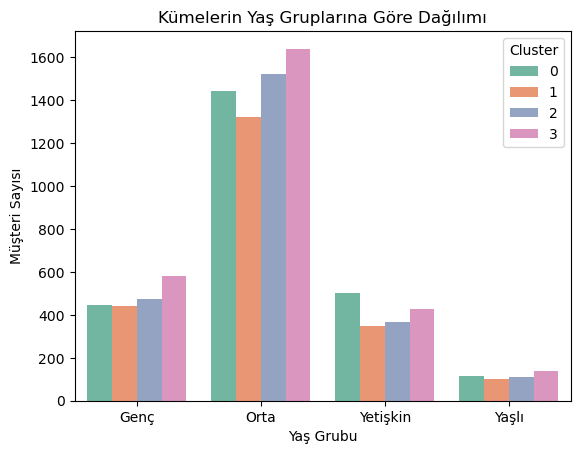

In [78]:
sns.countplot(data=df, x='AgeGroup', hue='Cluster', palette='Set2')
plt.title('Kümelerin Yaş Gruplarına Göre Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Müşteri Sayısı')
plt.show()


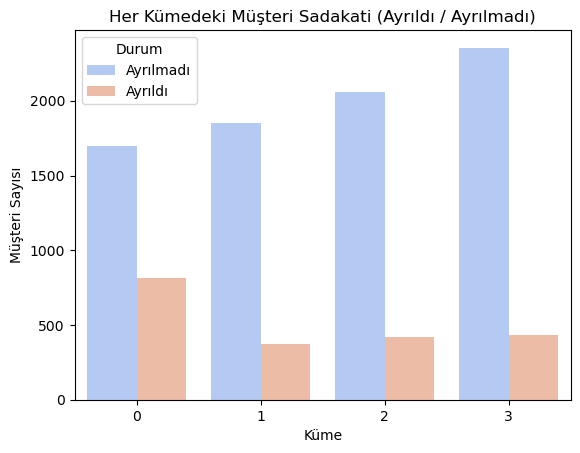

In [79]:
sns.countplot(data=df, x='Cluster', hue='Exited', palette='coolwarm')
plt.title('Her Kümedeki Müşteri Sadakati (Ayrıldı / Ayrılmadı)')
plt.xlabel('Küme')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Durum', labels=['Ayrılmadı', 'Ayrıldı'])
plt.show()


# Kümelerin Yorumlanması ve İsimlendirilmesi

## Kullanılan Veriler
Proje, aşağıdaki müşteri özelliklerine dayalı verileri kullanarak segmentasyon yapmıştır:

- Kredi Skoru
- Yaş
- Bakiye
- Ürün Sayısı
- Tahmini Maaş
- Aktif Üyelik Durumu
- Kredi Kartı Sahipliği
- Coğrafya (Almanya, İspanya, Fransa)
- Cinsiyet

Bu veriler, müşterilerin finansal davranışlarını ve sadakat düzeylerini anlamamıza yardımcı olmuştur.

## Grupların Tanımlanması ve Sadakat Durumuna Göre Segmentasyon

<font color='red'>-></font> Veri madenciliği sürecinde, grupları oluştururken müşteri sadakatini dikkate alarak gruplama yapılmıştır. Aşağıda, her bir grup için sadakat durumu ve önerilen tarifeler bulunmaktadır:

### Grup 0: Yüksek Potansiyel Sadık Müşteriler (Almanya)

- Yaş: 39.77
 
- Kredi Skoru: 651.45
 
- Bakiye: 119,730.12
 
- Ürün Sayısı: 1.52 (yaklaşık 2 ürün)
 
- Aktif Üyelik: 0.50
 
- Kredi Kartı Sahipliği: 0.71
 
- Coğrafya: Almanya
 
- Sadakat Durumu: Sadık Müşteriler (Yüksek Potansiyel)

<font color='red'>-></font> Açıklama: Yüksek bakiye ve kredi kartı sahipliği, bu grubun finansal kurumlarla güçlü bir bağ kurduğunu gösterir. Ancak, aktiflik oranı orta seviyede olduğu için daha fazla etkileşim teşvik edilebilir.

<font color='red'>!!!</font> Önerilen Tarife: “Sadık Müşteri Avantaj Paketi” – Yüksek bakiye ve kredi kartı sahipliği olan bu müşterilere özel faiz oranları, ödüller ve bireysel finansal danışmanlık sunulabilir. Ayrıca, aktiflik seviyesini artırmak için kişiselleştirilmiş teklifler sunulabilir.

## Grup 1: Sadakat Oluşturulabilir Müşteriler (İspanya)

- Yaş: 38.77

- Kredi Skoru: 649.50

- Bakiye: 64,998.85

- Ürün Sayısı: 1.53 (yaklaşık 2 ürün)

- Aktif Üyelik: 0.52

- Kredi Kartı Sahipliği: 0.00

- Coğrafya: İspanya

- Sadakat Durumu: Düşük Sadakat (Sadakat Oluşturulabilir)

<font color='red'>-></font> Açıklama: Kredi kartı sahipliği olmayan ve orta düzeyde bakiye sahibi bu grup, sadakat oluşturulabilir bir müşteri segmentidir. Sadakat programları ile müşteri bağlılığı artırılabilir.

<font color='red'>!!!</font> Önerilen Tarife: “Sadakat Geliştirme Paketi” – Kredi kartı edinme teşvikleri ve düşük bakiye için cazip faiz oranları sunulabilir. Ayrıca, aktifliklerini artırmaya yönelik ödüller ve bonuslar verilebilir.

## Grup 2: Sadık Müşteriler (Potansiyel Yükseltilebilir) (İspanya)

- Yaş: 38.56

- Kredi Skoru: 651.24

- Bakiye: 122,481.36

- Ürün Sayısı: 1.21 (yaklaşık 1 ürün)

- Aktif Üyelik: 0.53

- Kredi Kartı Sahipliği: 1.00

- Coğrafya: İspanya

- Sadakat Durumu: Sadık Müşteriler (Potansiyel Yükseltilebilir)

<font color='red'>-></font> Açıklama: Yüksek kredi kartı sahipliği ve bakiye ile bu grup sadık kalmaya yatkındır. Ancak, ürün sayısı düşük olduğundan, müşterilerin daha fazla ürün alması teşvik edilebilir.

<font color='red'>!!!</font> Önerilen Tarife: “Sadık Müşteri Geliştirme Paketi” – Birden fazla ürün alması teşvik edilebilir. Ayrıca, kredi kartı harcamalarına dayalı ödüller ve faiz indirimi gibi teşvikler sunulabilir.

## Grup 3: Orta Düzeyde Sadık Müşteriler (İspanya)

- Yaş: 38.60

- Kredi Skoru: 649.89

- Bakiye: 5,898.35

- Ürün Sayısı: 1.82 (yaklaşık 2 ürün)

- Aktif Üyelik: 0.51

- Kredi Kartı Sahipliği: 0.99

- Coğrafya: İspanya

- Sadakat Durumu: Orta Düzeyde Sadık Müşteriler

<font color='red'>-></font> Açıklama: Yüksek kredi kartı sahipliği ve ürün kullanımına sahip ancak düşük bakiye sahibi olan bu grup, sadık bir müşteri kitlesi olabilir. Ancak, düşük bakiye nedeniyle sadakati daha da güçlendirecek stratejiler gereklidir.

<font color='red'>!!!</font> Önerilen Tarife: “Genç ve Sadakat Arayan Paket” – Kredi kartı avantajları ve düşük bakiye için uygun faiz oranları sunulabilir. Ayrıca, müşterilerin daha fazla ürün almasını teşvik etmek için özel kampanyalar yapılabilir.

# DBSCAN Kümeleme Analizi

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Veriyi yükleyin ve standartlaştırın
features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts',
            'EstimatedSalary', 'IsActiveMember', 'HasCrCard',
            'Geography_Germany', 'Geography_Spain', 'Gender_Male']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# DBSCAN uygulaması
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Kümeleme sonuçlarını kontrol edin
df["cluster"] = labels

# Gürültü noktalarını (label = -1) hariç tutarak Silhouette skoru hesapla
mask = labels != -1
if len(set(labels[mask])) > 1:
    score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"DBSCAN Silhouette Skoru (gürültü hariç): {score:.4f}")
else:
    print("DBSCAN sadece bir küme (veya sadece gürültü) buldu.")


DBSCAN Silhouette Skoru (gürültü hariç): 0.1648


In [81]:
# Gürültüleri (-1) dahil ederek tüm kümeler için ortalama değerler
cluster_summary = df.groupby("cluster")[features].mean().round(2)
print(cluster_summary)


         CreditScore    Age    Balance  NumOfProducts  EstimatedSalary  \
cluster                                                                  
-1            650.02  41.77   89951.96           1.54         99729.09   
 0            621.63  37.98       0.00           1.00        114460.27   
 1            672.57  34.90       0.00           2.00        108598.40   
 2            659.92  36.48  118636.07           1.00         95498.70   
 3            654.09  35.22       0.00           2.00        103362.32   
...              ...    ...        ...            ...              ...   
 144          688.40  37.60  100957.88           2.00         24831.08   
 145          596.00  50.50  108213.23           1.00          5414.03   
 146          688.80  34.80   85410.92           2.00        176780.16   
 147          683.50  39.75  116781.62           1.00         24438.18   
 148          518.25  39.25  122866.15           1.00        150581.44   

         IsActiveMember  HasCrCard  G

In [82]:
dbscan = DBSCAN(eps=1.2, min_samples=5)

In [83]:
df[df['cluster'] == -1].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,4669.0,650.02,112.91,350.00,563.00,651.00,738.00,850.00
Age,4669.0,41.77,12.87,18.00,32.00,40.00,50.00,92.00
Tenure,4669.0,4.99,2.91,0.00,2.00,5.00,7.00,10.00
Balance,4669.0,89951.96,59698.92,0.00,12459.19,105173.99,133994.52,250898.09
NumOfProducts,4669.0,1.54,0.66,1.00,1.00,1.00,2.00,4.00
HasCrCard,4669.0,0.57,0.50,0.00,0.00,1.00,1.00,1.00
IsActiveMember,4669.0,0.54,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,4669.0,99729.09,59896.02,91.75,46857.52,99920.41,153046.16,199992.48
Exited,4669.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
Geography_Germany,4669.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00


## Kümelerin Detaylı Analizi ve Aksiyon Önerileri:

### Küme 0:

Özellikler:

- Yaş: 37.98 (Ortalama yaşın altında)

- Kredi Skoru: 621.63 (Ortalamanın altında)

- Bakiye: 0 (Hiç bakiyesi yok)

- NumOfProducts: 1.00 (Bir ürün kullanıyor)

- Aktif Üye: %100

- Kredi Kartı: %100

<font color='red'>-></font> Yorum: Bu grup, aktif ama yeni başlayan müşteriler ya da kredi kullanmayan, sadık kullanıcılar olabilir.

#### Aksiyon Önerileri:

- Kredi Kartı Tanıtımları: Bu müşterilere, yüksek faizli krediler yerine düşük faizli krediler veya özel kampanyalar sunulabilir.

- Banka Ürünleri Genişletme: İlk ürününü almış kullanıcılar için ekstra ürün promosyonları (tasarruf hesapları, kredi ürünleri) önerilebilir.

- Sadakat Programları: Bu grup aktif üyeler olduğundan, sadakat programlarıyla müşteri tutma sağlanabilir.

### Küme 1:

Özellikler:

- Yaş: 34.90 (Genç yaş)

- Kredi Skoru: 672.57 (Ortalamanın üzerinde)

- Bakiye: 0 (Hiç bakiyesi yok)

- NumOfProducts: 2.00 (İki ürün kullanıyor)

- Aktif Üye: %0

- Kredi Kartı: %0

<font color='red'>-></font> Yorum: Bu grup, yeni veya düşük riskli müşteri olabilir, ancak ürün sayısı sınırlı. Kredi kullanmayan genç kullanıcılar.

#### Aksiyon Önerileri:

- Müşteri Eğitim ve Bilgilendirme: Genç yaşta oldukları için, finansal okuryazarlığı artıracak eğitim ve seminerler sunulabilir.
 
- Yüksek Performanslı Ürünler Sunma: Bu müşterilere kredi kartı gibi yüksek fayda sağlayacak ürünler önerilebilir.
 
- Gençler İçin Uygun Krediler: Daha düşük faizli gençlere özel krediler ya da uzun vadeli ödeme planları önerilebilir.

### Küme 2:

Özellikler:

- Yaş: 36.48 (Ortalama yaşın altında)
 
- Kredi Skoru: 659.92 (Ortalamanın üzerinde)
 
- Bakiye: 118,636.07 (Yüksek bakiye)

- NumOfProducts: 1.00 (Bir ürün kullanıyor)

- Aktif Üye: %100

- Kredi Kartı: %100

<font color='red'>-></font> Yorum: Bu grup, yüksek gelirli ve aktif kullanıcılar olabilir. Yüksek bakiyeleri ve kredileri kullanma eğilimindeler.

#### Aksiyon Önerileri:

- Özel Yüksek Limitli Kredi Ürünleri: Yüksek bakiyeli bu kullanıcıya premium kredi ürünleri veya yatırım fırsatları önerilebilir.
 
- VIP Müşteri Hizmetleri: Bu gruba özel banka danışmanlığı ve özel VIP hizmetler sunulabilir.
 
- Özelleştirilmiş Finansal Planlar: Bu grup için yatırım danışmanlığı ve portföy yönetimi gibi teklifler oluşturulabilir.

### Küme 3:

Özellikler:

- Yaş: 35.22
 
- Kredi Skoru: 654.09
 
- Bakiye: 0 (Hiç bakiyesi yok)

- NumOfProducts: 2.00

- Aktif Üye: %100

- Kredi Kartı: %100

- Geography_Spain = 1

<font color='red'>-></font> Yorum: İspanya'da bulunan, çok sayıda ürün kullanan ama kredisi olmayan kullanıcılar. Genellikle aktifler ama kredili ürün kullanmıyorlar.

#### Aksiyon Önerileri:

- Finansal Ürünler Tanıtımı: Bu kullanıcılara, kredi ürünleri ve finansal planlar gibi ek ürünler önerilebilir.

- İspanya'ya Özel Promosyonlar: İspanya'daki özel promosyonlar ve fırsatlar sunulabilir.

- Yüksek Faizli Tasarruf Hesapları veya Kredi Ürünleri: Ürünlerini çeşitlendirmeleri için yüksek faizli tasarruf hesapları sunulabilir.